In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df=pd.read_csv("C:/Users/Raj Gupta/Downloads/Advertising.csv")

In [20]:
df.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [21]:
df=df.drop(["Unnamed: 0"],axis=1)

In [22]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
df.shape

(200, 4)

In [24]:
df.size

800

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [26]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\Raj Gupta\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Raj Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Raj Gupta\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Raj Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Raj Gupta\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  w

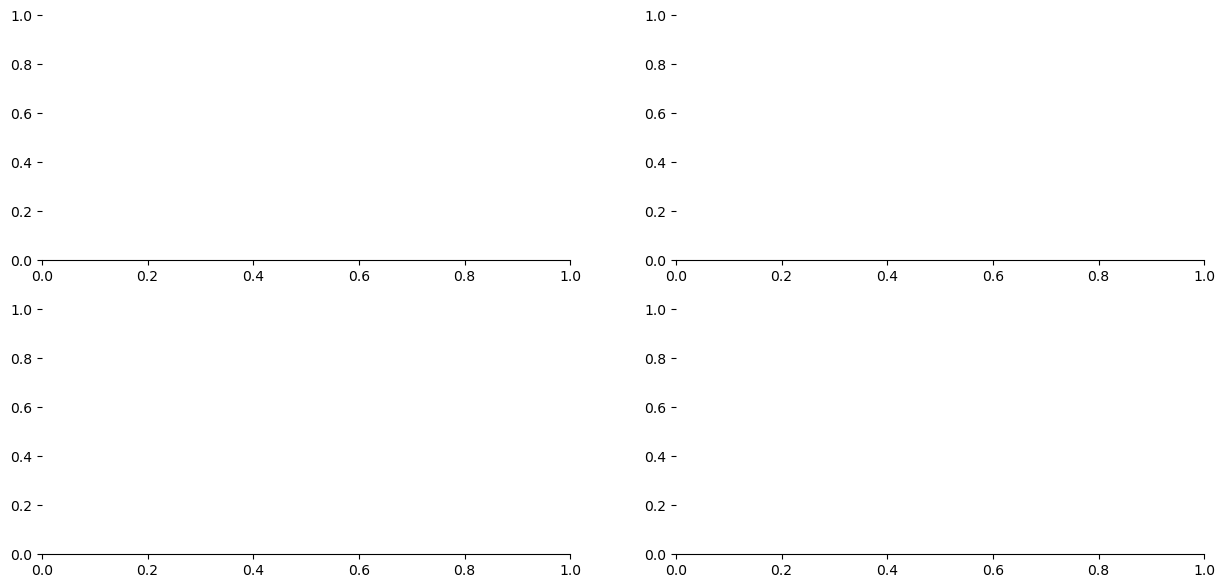

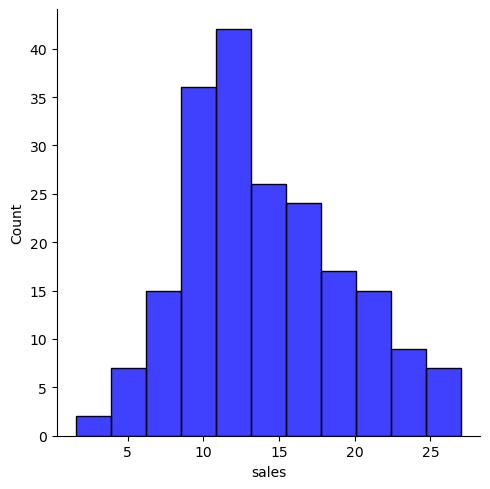

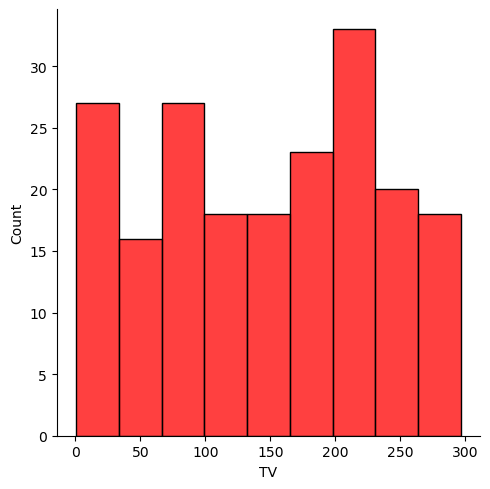

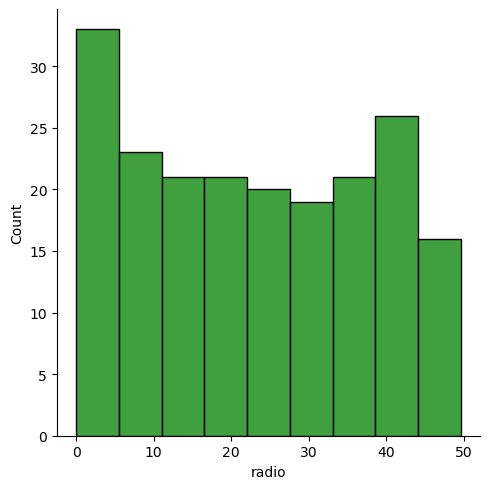

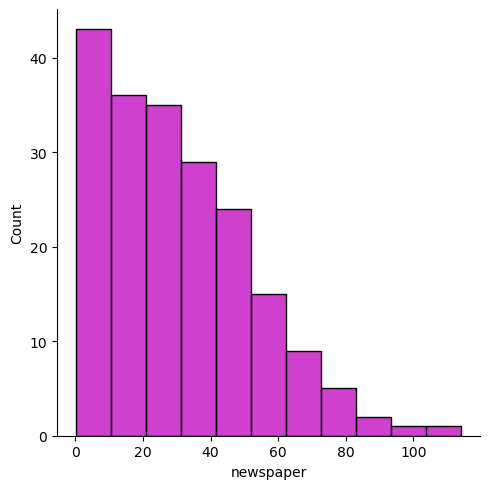

In [27]:
f, axes = plt.subplots(2,2, figsize=(15,7), sharex=False)
sns.despine(left=True)
sns.displot(df.sales, color="b",ax=axes[0,0])
sns.displot(df.TV, color="r",ax=axes[0,1])
sns.displot(df.radio, color="g",ax=axes[1,0])
sns.displot(df.newspaper, color="m",ax=axes[1,1])

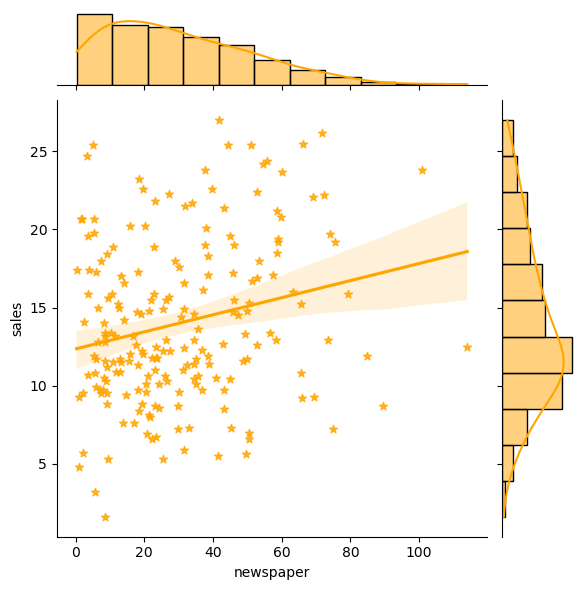

In [33]:
JG1=sns.jointplot(x="newspaper",y="sales", data=df, kind='reg',color="orange", marker="*")

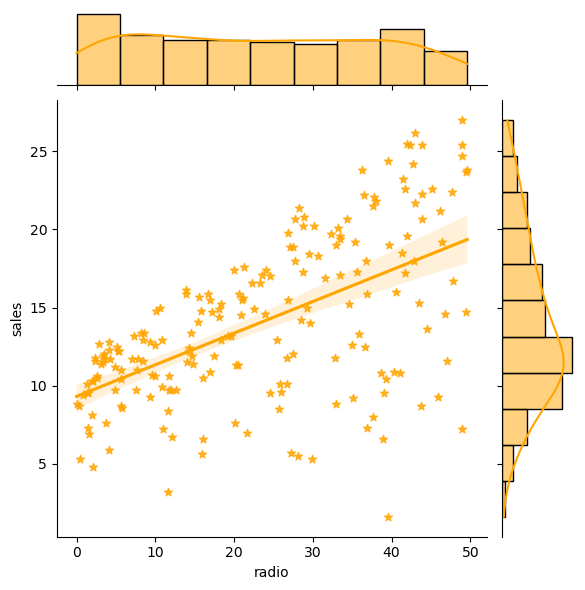

In [35]:
JG2= sns.jointplot(x="radio", y="sales",data=df, kind='reg',color="orange", marker="*")

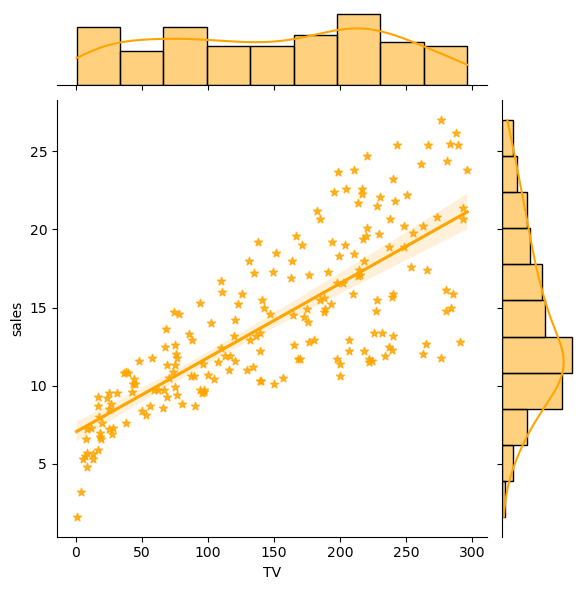

In [37]:
JG2= sns.jointplot(x="TV", y="sales",data=df, kind='reg',color="orange", marker="*")

C:\Users\Raj Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


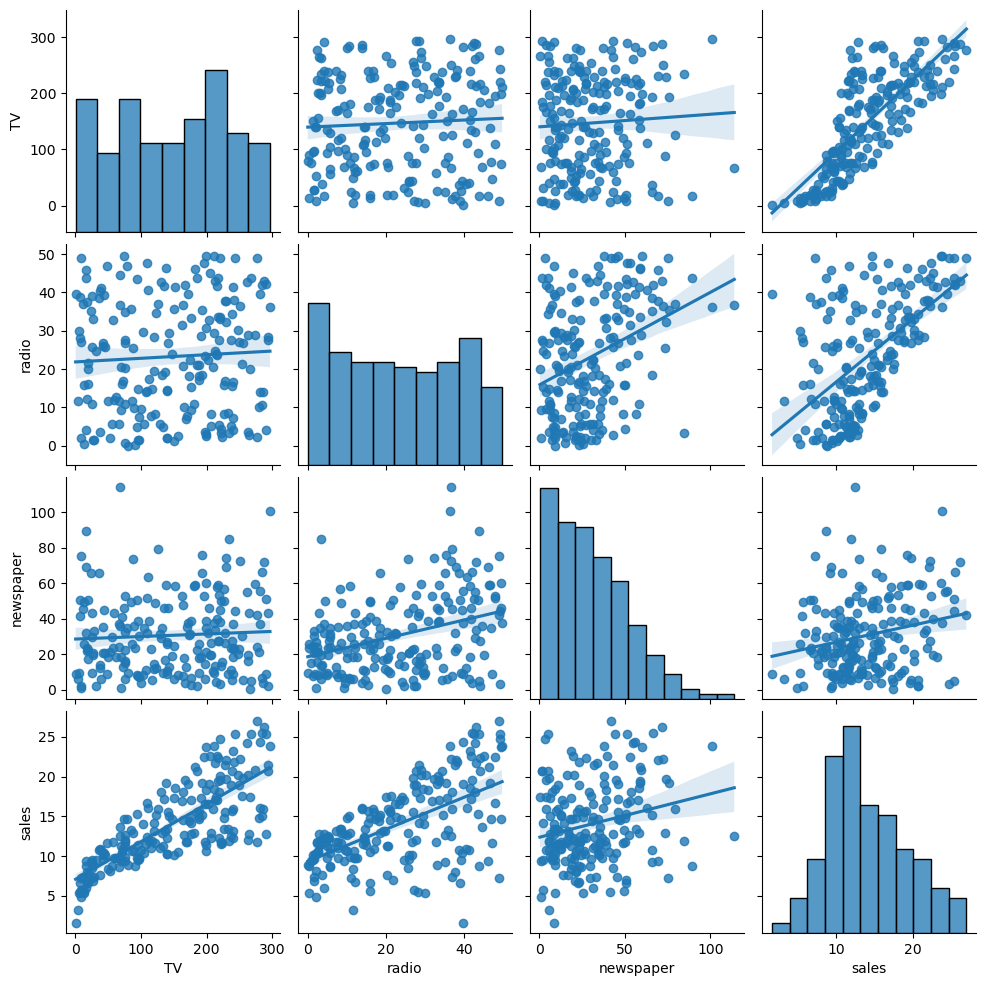

In [40]:
sns.pairplot(df, kind='reg')

C:\Users\Raj Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Raj Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


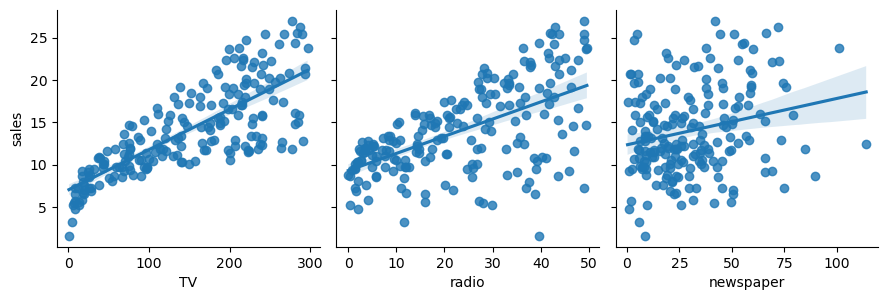

In [38]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', size=3, kind='reg')

In [42]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

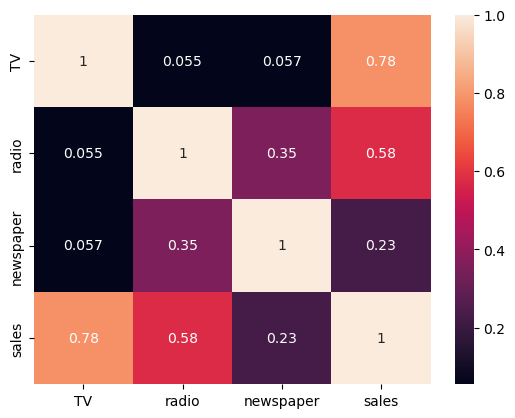

In [43]:
sns.heatmap(df.corr(), annot=True)

In [45]:
feature=df[['TV','radio','newspaper']]

In [46]:
target=df['sales']

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test= train_test_split(feature,target ,test_size=0.33, random_state=42)

In [50]:
df.shape

(200, 4)

In [54]:
print('Train case as below')
print('X_train shape:',X_train.shape)
print('y_train shape', y_train.shape)
print('\nTest cases as below')
print('X_test shape', X_test.shape)
print('y_tet shape', y_test.shape)

Train case as below
X_train shape: (134, 3)
y_train shape (134,)

Test cases as below
X_test shape (66, 3)
y_tet shape (66,)


In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
print('Intercept',lr.intercept_)
print('Coefficients',lr.coef_)

Intercept 2.758071619217109
Coefficients [0.04466512 0.19663006 0.00607439]


In [58]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [64]:
(lr.coef_).T

array([0.04466512, 0.19663006, 0.00607439])

In [68]:
x=pd.DataFrame((lr.coef_).T, index=X_train.columns, columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

In [69]:
x

,Co-efficients
radio,0.196630
TV,0.044665
newspaper,0.006074


In [70]:
y_pred_train = lr.predict(X_train)

In [71]:
y_pred_test = lr.predict(X_test)

In [72]:
y_pred_test

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test= mean_absolute_error(y_test, y_pred_test)
print("MAE_train",MAE_train)
print("MAE_test", MAE_test)

MAE_train 1.1308878428716256
MAE_test 1.4937750024728966


In [77]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test= mean_squared_error(y_test, y_pred_test)
print("MSE_train",MSE_train)
print("MSE_test", MSE_test)

MSE_train 2.410858654557854
MSE_test 3.7279283306815105


In [78]:
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test= np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE_train",RMSE_train)
print("RMSE_test", RMSE_test)

RMSE_train 1.5526939990087725
RMSE_test 1.9307843822347204


In [79]:
R2_train=r2_score(y_train, y_pred_train)
R2_test=r2_score(y_test, y_pred_test)
print("R2_Score_train", R2_train)
print("R2_Score_test", R2_test)

R2_Score_train 0.9095216639030753
R2_Score_test 0.8555568430680086
